In [1]:
import numpy as np
import matplotlib.pyplot as plt
from animator import animate_Clusters
from DataSetGen import generate_cluster_data, load_fund_data_as_numpy
from ReinforcementClustering import reinforcement_clustering

# For Clustering

In [2]:
# # Example synthetic data

# N = 100 # number of nodes
# K = 4 # number of clusters
# P = 0.1 # cluster varience

# X = generate_cluster_data(N, K, P, random_seed=1)

# beta_min = 0.01
# beta_max = 20.0
# tau = 1.1


# pi_star_list, Y_list = reinforcement_clustering(
#     beta_min, beta_max, tau, K, X, episodes=200
# )
# Y_final = Y_list[-1]
# pi_star = pi_star_list[-1]


# For Funding Data

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = load_fund_data_as_numpy('StrategicMutualFunds.xlsx')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

(100, 2)


In [23]:


K = 3
beta_min = 0.01
beta_max = 20
tau = 1.1


pi_star_list, Y_list = reinforcement_clustering(
    beta_min, beta_max, tau, K, X_pca, episodes=200
)
Y_final = Y_list[-1]
pi_star = pi_star_list[-1]

# Plotting The Results

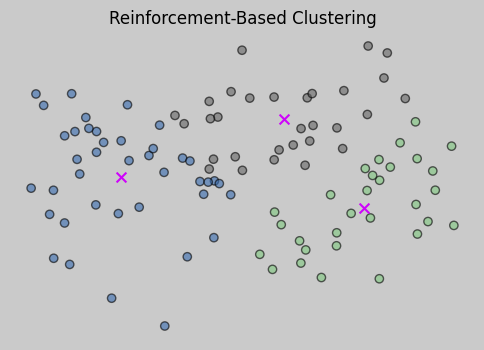

In [25]:
plt.figure(figsize=(6, 4), facecolor="#CACACA", edgecolor="#000000")
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=pi_star,
    cmap="Accent",
    marker="o",
    edgecolors="black",
    alpha=0.6,
    label="Data points",
)
plt.scatter(
    Y_final[:, 0], Y_final[:, 1], c="#ce04fb", marker="x", s=50, label="Centroids"
)
plt.title("Reinforcement-Based Clustering")
plt.axis("off")
plt.show()

In [17]:
animate_Clusters(X, Y_list, pi_star_list, interval=200)